In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Data Formatting

In [2]:
begin_date_template = "-01-01"
end_date_template = "-04-19"

def format_data(df, year):
    df["Date"] = pd.to_datetime(df["Date"])
    begin_date = pd.to_datetime(year+begin_date_template)
    end_date = pd.to_datetime(year+end_date_template)
    df.loc[(df["Date"]>=begin_date) & (df["Date"]<=end_date)].to_csv("processed_data/aqi_{}.csv".format(year),index=False)

In [3]:
aqi_20_data = pd.read_csv("raw_data/waqi-covid19-airqualitydata-2020.csv")
format_data(aqi_20_data,"2020")
del aqi_20_data

In [4]:
aqi_19_q1 = pd.read_csv("raw_data/waqi-covid19-airqualitydata-2019Q1.csv")
aqi_19_q2 = pd.read_csv("raw_data/waqi-covid19-airqualitydata-2019Q2.csv")
aqi_19_data = pd.concat([aqi_19_q1,aqi_19_q2])
format_data(aqi_19_data,"2019")
del aqi_19_data, aqi_19_q1, aqi_19_q2

In [5]:
for year in ["2015","2016","2017","2018"]:
    df = pd.read_csv("raw_data/waqi-covid19-airqualitydata-{}H1.csv".format(year))
    format_data(df,year)

### Data Visualization

In [2]:
def get_city_pollutant_data(city, pollutant, years=["2015","2016","2017","2018","2019","2020"]):
    yearwise_data = []
    for year in years:
        df = pd.read_csv("processed_data/aqi_{}.csv".format(year))
        df = df.loc[(df["City"]==city) & (df["Specie"]==pollutant)]
        date = pd.DatetimeIndex(df["Date"])
        df["Month"] = date.month
        df["Day"] = date.day
        data = pd.DataFrame({
                             "Month":df["Month"],
                             "Day":df["Day"],
                             year:df["median"]
                            }).reset_index(drop=True)
        yearwise_data.append(data)
    yearwise_data = reduce(lambda x, y: pd.merge(x, y, on = ['Month','Day'],how="outer"), yearwise_data)
    yearwise_data["Year"]=2020
    yearwise_data["Date"] = pd.to_datetime(yearwise_data[["Year","Month","Day"]])
    yearwise_data.drop(axis=1, columns=["Year","Month","Day"],inplace=True)
    yearwise_data.sort_values("Date",inplace=True)
    return yearwise_data[["Date"]+years].reset_index(drop=True)

In [3]:
z = get_city_pollutant_data("Delhi","pm25",["2019","2020"])

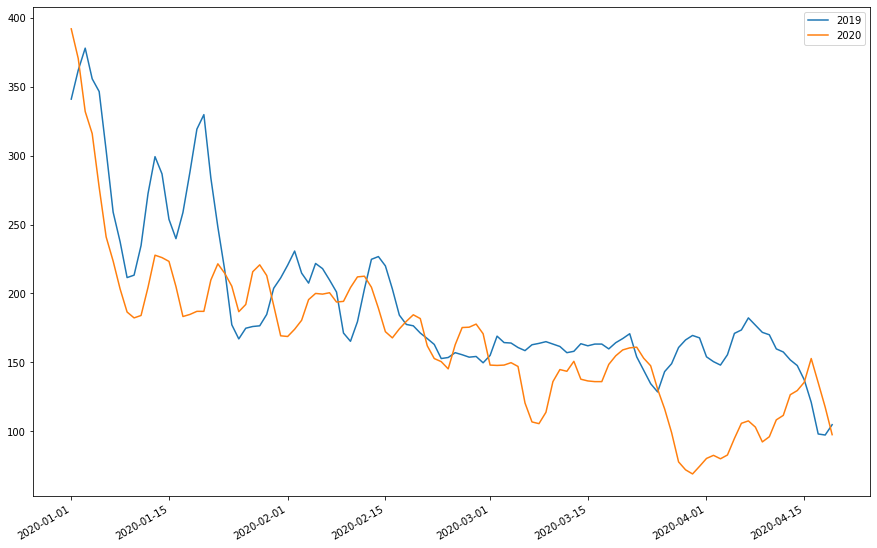

In [5]:
fig = plt.figure(figsize=(15,10))
for year in ["2019","2020"]:
    plt.plot(z["Date"],z[year].rolling(window=4, min_periods=1).mean(),label=year)
plt.legend()
plt.gcf().autofmt_xdate()

In [6]:
z = get_city_pollutant_data("Delhi","co",["2019","2020"])

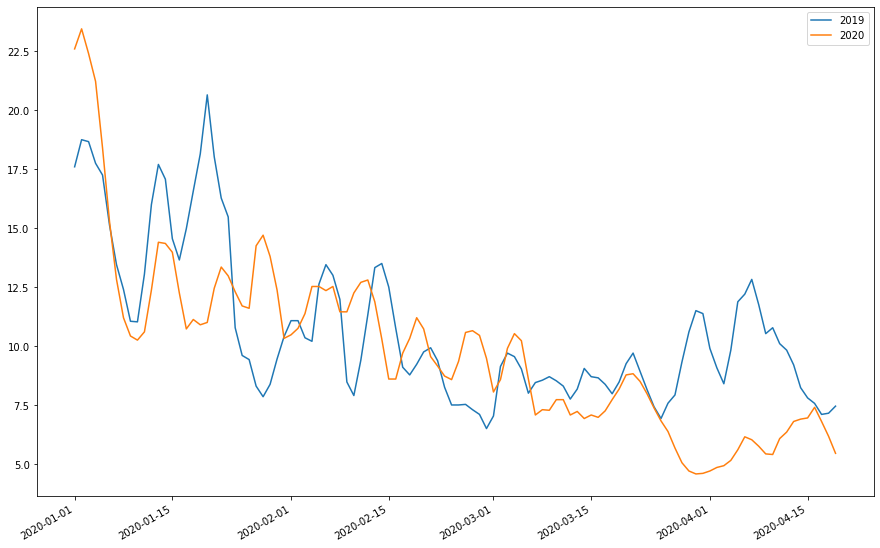

In [7]:
fig = plt.figure(figsize=(15,10))
for year in ["2019","2020"]:
    plt.plot(z["Date"],z[year].rolling(window=4, min_periods=1).mean(),label=year)
plt.legend()
plt.gcf().autofmt_xdate()